# Loading packages & data

In [1]:
# Import packages
import pandas as pd

# Remove column display limit for pandas
pd.set_option('display.max_columns', None)

In [2]:
# Load CSVs from Google Drive
# Try to avoid having to re-run this because it takes a while
crime_2020_2024 = '1V9pJ1fghA9FIYP1PgR_lfx-3lAMJPxWo'
crime_2010_2019 = '1HfsVnsIApb0wC05yQevKZTe_G71qmZ5O'

url_2010=f'https://drive.usercontent.google.com/download?id={crime_2010_2019}&export=download&authuser=0&confirm=t'
url_2020=f'https://drive.usercontent.google.com/download?id={crime_2020_2024}&export=download&authuser=0&confirm=t'

df_2020 = pd.read_csv(url_2020, on_bad_lines='skip')
df_2010 = pd.read_csv(url_2010, on_bad_lines='skip')

In [3]:
# 'AREA' column has a stray space in one DF, making it not concatenate properly
df_2010 = df_2010.rename(columns={'AREA ': 'AREA'})

# Concatenate dataframes
df = pd.concat([df_2010, df_2020])
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


# Cleaning data
### Dropping columns

In [4]:
# Drop columns that are useless for analysis, ETL, and feature engineering
cols_to_drop = ['Cross Street', 'Part 1-2', 'LOCATION', 'Rpt Dist No', 'DR_NO']
df = df.drop(columns=cols_to_drop)

# Review new columns
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd',
       'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT',
       'LON'],
      dtype='object')

### Renaming columns

In [5]:
# Rename columns to one format (camel case)
df = df.rename(columns={
    'Date Rptd': 'reportDate',
    'DATE OCC': 'crimeDate',
    'TIME OCC': 'crimeTime',
    'AREA': 'area',
    'AREA NAME': 'areaName',
    'Crm Cd': 'crimeCode',
    'Crm Cd Desc': 'crimeCodeDescription',
    'Mocodes': 'moCodes',
    'Vict Age': 'victimAge',
    'Vict Sex': 'victimSex',
    'Vict Descent': 'victimDescent',
    'Premis Cd': 'siteCode',
    'Premis Desc': 'siteDescription',
    'Weapon Used Cd': 'weaponCode',
    'Weapon Desc': 'weaponDescription',
    'Status': 'status',
    'Status Desc': 'statusDescription',
    'Crm Cd 1': 'crimeCode1',
    'Crm Cd 2': 'crimeCode2',
    'Crm Cd 3': 'crimeCode3',
    'Crm Cd 4': 'crimeCode4',
    'LAT': 'lat',
    'LON': 'lon'
})

### Null values

In [6]:
# Address null values
df['moCodes'] = df['moCodes'].fillna('0') # no code
df['victimSex'] = df['victimSex'].fillna('x') # x is other/unknown
df['victimDescent'] = df['victimDescent'].fillna('x') # x is other/unknown
df['siteCode'] = df['siteCode'].fillna(0) # no code
df['siteDescription'] = df['siteDescription'].fillna('other') # other/unknown site
df['weaponCode'] = df['weaponCode'].fillna(0) # no code
df['weaponDescription'] = df['weaponDescription'].fillna('unknown/none') # weapon either unknown or wasn't involved
df[['crimeCode1','crimeCode2','crimeCode3','crimeCode4']] = df[['crimeCode1','crimeCode2','crimeCode3','crimeCode4']].fillna(0) # no code

# status has 4 nulls, and is our target column, so it makes more sense to drop these than to fill them
df = df.dropna(subset='status')

# Verify no more nulls 
df.isna().sum()

reportDate              0
crimeDate               0
crimeTime               0
area                    0
areaName                0
crimeCode               0
crimeCodeDescription    0
moCodes                 0
victimAge               0
victimSex               0
victimDescent           0
siteCode                0
siteDescription         0
weaponCode              0
weaponDescription       0
status                  0
statusDescription       0
crimeCode1              0
crimeCode2              0
crimeCode3              0
crimeCode4              0
lat                     0
lon                     0
dtype: int64

### Reformatting data

In [7]:
# Convert all string values to lower case
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

# Convert codes to strings
df[['crimeCode', 'siteCode', 'weaponCode', 'crimeCode1', 'crimeCode2', 'crimeCode3', 'crimeCode4']] = df[['crimeCode', 'siteCode', 'weaponCode', 'crimeCode1', 'crimeCode2', 'crimeCode3', 'crimeCode4']].astype(int).astype(str)

# Inspect results
df.head()

,reportDate,crimeDate,crimeTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon
0,02/20/2010 12:00:00 am,02/20/2010 12:00:00 am,1350,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695
1,09/13/2010 12:00:00 am,09/12/2010 12:00:00 am,45,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962
2,08/09/2010 12:00:00 am,08/09/2010 12:00:00 am,1515,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524
3,01/05/2010 12:00:00 am,01/05/2010 12:00:00 am,150,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295
4,01/03/2010 12:00:00 am,01/02/2010 12:00:00 am,2100,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488


### Formatting time data

In [8]:
# Convert date/time data
# reportDate and crimeDate have no time data. All are midnight by default
# crimeTime contains time data that can be merged with crimeDate

# Reduce reportDate and crimeDate to just the date info by slicing the first 10 characters
df['reportDate'] = df['reportDate'].str[:10]
df['crimeDate'] = df['crimeDate'].str[:10]

# crimeTime was interpretted as an integer, so '45' is actually '00:45'
# Convert to string and use zfill to pad the missing zeros
df['crimeTime'] = df['crimeTime'].astype(str).str.zfill(4)

# reportDate can be converted to a datetime with a mm/dd/yyyy format
df['reportDate'] = pd.to_datetime(df['reportDate'], format='%m/%d/%Y')

# crimeDate can be converted to a datetime after combining it with the crimeTime
# Create the series object
crimeDateTime_srs = pd.to_datetime(df['crimeDate'] + ' ' + df['crimeTime'], format='%m/%d/%Y %H%M')
# Use pd.DataFrame.insert() because we want it near the other datetime columns
df.insert(3, 'crimeDateTime', crimeDateTime_srs)

# Verify our work
df.head()

,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488


### Erroneous/unusual data

<Axes: xlabel='lon', ylabel='lat'>

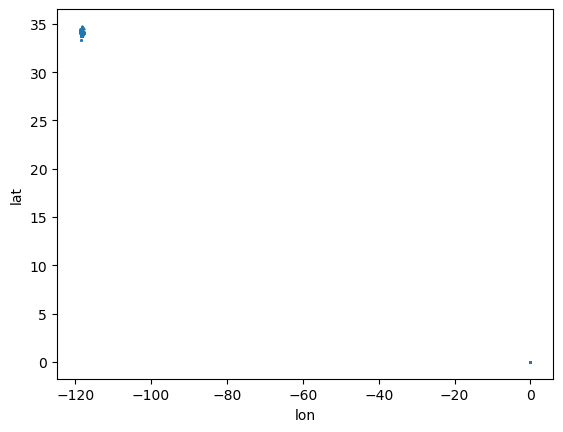

In [9]:
# We can see that some of our lat/lon data is set to 0,0 (not Los Angeles)
df[['lon', 'lat']].plot(kind='scatter', x='lon', y='lat', s=0.5)

In [12]:
# See how many records are like this
print(f'{len(df[df["lat"]==0]):,} of {len(df):,} records have no coordinate data ({100*(len(df[df["lat"]==0])/len(df)):.3f}%)')

# Trying to understand this issue better, we'll find these records from a dataset before we removed columns
df_2020[df_2020['LAT']==0].head()

# First observation is that there's nothing about these records that explains why there is no latitude or longitude data.
# One way we could fill those values is to attempt to use a python package like geopy to look up the coordinates of valid street addresses
    # https://github.com/geopy/geopy?tab=readme-ov-file#geocoding
# Another option is to replace these values with the geometric center of the reported district (area) as a best estimate.
# Considering this is only about 0.1% of our total data, and we have time constraints, the juice is not worth the squeeze. We'll delete them.

3,170 of 3,093,657 records have no coordinate data (0.102%)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
558,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,2,354,THEFT OF IDENTITY,1501,30,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,3700 VETERAN AV,NaN,0.0,0.0
2265,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,2,900,VIOLATION OF COURT ORDER,2038 0913 0361,65,M,H,504.0,OTHER RESIDENCE,NaN,NaN,IC,Invest Cont,900.0,NaN,NaN,NaN,2400 E 7TH ST,NaN,0.0,0.0
2630,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,1,648,ARSON,NaN,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,648.0,NaN,NaN,NaN,LANKERSHIM,VINELAND,0.0,0.0
2914,200817064,12/01/2020 12:00:00 AM,12/01/2020 12:00:00 AM,1340,8,West LA,882,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 2004 0345 0344 1402,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,440.0,998.0,NaN,NaN,OLYMPIC BL,BELOIT,0.0,0.0
3088,201410528,05/06/2020 12:00:00 AM,05/06/2020 12:00:00 AM,740,14,Pacific,1494,2,888,TRESPASSING,1501 2004,0,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),NaN,NaN,IC,Invest Cont,888.0,NaN,NaN,NaN,300 WORLD WY,NaN,0.0,0.0


In [13]:
# Remove records where lat or lon are zero
df = df[(df['lat']!=0)|(df['lon']!=0)]

# Verify our work
print(f"{len(df[(df['lat']==0)|(df['lon']==0)])} records remain with lat/lon of zero")

0 records remain with lat/lon of zero


# Category reduction and encoding

In [30]:
# Concept of categorizing and encoding categories

# Come up with a list of categories that they should fall into
# For each category, come up with a list of keywords that can easily identify things that match that category
# Use the apply.(lambda) format below to create an encoded column for that category (1 or 0)
# Remember that it's okay for one thing to fall into multiple categories, if it makes sense
# For example I might have a category for violent crime, domestic crime, and crimes involving children, and a domestic child abuse report would be in all 3 categories.

# Example
# Keyword list (theft)
theft_keywords = ['robbery', 'shoplift', 'theft', 'burglary', 'stolen', 'pickpocket', 'extortion', 'bunco', 'till tap', 'snatching']

# A binary value column to indicate that the crime falls into the theft category
df['crimeTheft'] = df['crimeCodeDescription'].apply(lambda x: 1 if any([word in x for word in theft_keywords]) else 0)

# Keyword list (involving children)
children_keywords = ['minor', 'child', 'chld']

# A binary value column to indicate that the crime falls into the children-involved category
df['crimeChild'] = df['crimeCodeDescription'].apply(lambda row: 1 if any([word in row for word in children_keywords]) else 0)

# A sample of data showing this working as intended
df.sample(20, random_state=0)[['crimeCodeDescription', 'crimeTheft', 'crimeChild']]

,crimeCodeDescription,crimeTheft,crimeChild
141180,human trafficking - commercial sex acts,0,0
961253,attempted robbery,1,0
1673756,theft plain - petty ($950 & under),1,0
962411,other miscellaneous crime,0,0
897023,burglary,1,0
1370893,child abuse (physical) - simple assault,0,1
424737,burglary,1,0
442962,theft of identity,1,0
896090,vehicle - stolen,1,0
856008,child neglect (see 300 w.i.c.),0,1
